<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

%matplotlib inline

scipy.test()

============================= test session starts ==============================
platform darwin -- Python 3.8.5, pytest-6.1.1, py-1.9.0, pluggy-0.13.1
rootdir: /Users/jamesking/Dropbox/IoD_Contents/labs/lab_4
collected 38547 items / 10989 deselected / 27558 selected

_build_utils/tests/test_circular_imports.py .                            [  0%]
_build_utils/tests/test_scipy_version.py .                               [  0%]
_lib/tests/test__gcutils.py ......                                       [  0%]
_lib/tests/test__pep440.py .........                                     [  0%]
_lib/tests/test__testutils.py ..                                         [  0%]
_lib/tests/test__threadsafety.py ..                                      [  0%]
_lib/tests/test__util.py ...............                                 [  0%]
_lib/tests/test_ccallback.py ....                                        [  0%]
_lib/tests/test_deprecation.py .                                         [  0%]
_lib/tests/

interpolate/tests/test_fitpack2.py ..................................... [ 17%]
..............                                                           [ 17%]
interpolate/tests/test_interpnd.py .....................                 [ 17%]
interpolate/tests/test_interpolate.py .................................. [ 17%]
........................................................................ [ 17%]
................................................                         [ 18%]
interpolate/tests/test_ndgriddata.py ............                        [ 18%]
interpolate/tests/test_pade.py ....                                      [ 18%]
interpolate/tests/test_polyint.py ...................................... [ 18%]
............                                                             [ 18%]
interpolate/tests/test_rbf.py ..........                                 [ 18%]
interpolate/tests/test_regression.py .                                   [ 18%]
io/arff/tests/test_arffread.py .........

ndimage/tests/test_c_api.py ...                                          [ 32%]
ndimage/tests/test_datatypes.py ..                                       [ 32%]
ndimage/tests/test_filters.py ..........................                 [ 32%]
ndimage/tests/test_measurements.py ..................................... [ 32%]
.....................................................................    [ 32%]
ndimage/tests/test_morphology.py .....                                   [ 32%]
ndimage/tests/test_ndimage.py .......................................... [ 32%]
........................................................................ [ 33%]
........................................................................ [ 33%]
........................................................................ [ 33%]
........................................................................ [ 33%]
................                                                         [ 33%]
ndimage/tests/test_regression.py ....   

........................................................................ [ 45%]
........................................................................ [ 45%]
........................................................................ [ 45%]
........................................................................ [ 45%]
........................................................................ [ 46%]
........................................................................ [ 46%]
........................................................................ [ 46%]
........................................................................ [ 46%]
.........................................................ss............. [ 47%]
........................................................................ [ 47%]
.....................                                                    [ 47%]
signal/tests/test_spectral.py .......................................... [ 47%]
........................................

......s..ss.................sssssxxs..sssss.s.s...........s........ss... [ 64%]
.........s.....s..ssssssssssssssssss....ssss.s..s...s..s.xsss........... [ 64%]
...ss.ss.................ssss..s..sssss.s.s..............s.............. [ 64%]
....................s....................................s.............. [ 64%]
..........................s..............s...............s.............. [ 65%]
......................s......................................s.......... [ 65%]
..............................s..............s...............s......s..s [ 65%]
s.........s....s..ssssssssssssssssss....ssss.ss.s...s..s.xss.........sss [ 65%]
..ss.ss................ssss...s..sssss.s.s...........s......s......s.... [ 66%]
............ss....................s.....s.s......s..ss.........sss....s. [ 66%]
.................................s..............s.....s................. [ 66%]
....ss.....................s.......s.......s..s...s.........sss...s..... [ 66%]
...............................s........

special/tests/test_loggamma.py ......                                    [ 82%]
special/tests/test_logit.py ......                                       [ 82%]
special/tests/test_logsumexp.py ..........                               [ 82%]
special/tests/test_mpmath.py ...................                         [ 82%]
special/tests/test_nan_inputs.py ....................................... [ 82%]
........................................................................ [ 82%]
........................................................................ [ 82%]
.........................................                                [ 83%]
special/tests/test_ndtr.py ....                                          [ 83%]
special/tests/test_orthogonal.py ...........................             [ 83%]
special/tests/test_orthogonal_eval.py .................................. [ 83%]
............................................................             [ 83%]
special/tests/test_owens_t.py ....      

stats/tests/test_tukeylambda_stats.py ...                                [100%]

=============================== warnings summary ===============================
optimize/tests/test__linprog_clean_inputs.py: 2 warnings
optimize/tests/test_linprog.py: 8 warnings
  /opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
    return array(a, dtype, copy=False, order=order)

-- Docs: https://docs.pytest.org/en/stable/warnings.html
= 25497 passed, 1980 skipped, 10989 deselected, 76 xfailed, 5 xpassed, 10 warnings in 619.27s (0:10:19) =


True

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [3]:
# Read CSV
housing = pd.read_csv('Sacramento_transactions.csv')

housing.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [4]:
housing['type'].value_counts()

Residential     917
Condo            54
Multi-Family     13
Unkown            1
Name: type, dtype: int64

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [5]:
# ANSWER
target_variable = housing['price']

#### 2.2 List all possible variables which might be Predictor variable.

In [6]:
# ANSWER
housing.columns

predictors = ['beds', 'baths', 'sq__ft', 'latitude', 'longitude'] # 'type'

In [7]:
housing_new = housing[predictors]

housing_new.head()

,beds,baths,sq__ft,latitude,longitude
0,2,1,836,38.631913,-121.434879
1,3,1,1167,38.478902,-121.431028
2,2,1,796,38.618305,-121.443839
3,2,1,852,38.616835,-121.439146
4,2,1,797,38.519470,-121.435768


#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [8]:
# ANSWER
housing_new.corr()

,beds,baths,sq__ft,latitude,longitude
beds,1.000000,0.839650,0.684041,-0.291307,-0.053993
baths,0.839650,1.000000,0.665690,-0.235792,0.016582
sq__ft,0.684041,0.665690,1.000000,-0.383274,-0.177742
latitude,-0.291307,-0.235792,-0.383274,1.000000,0.387925
longitude,-0.053993,0.016582,-0.177742,0.387925,1.000000


#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [9]:
# ANSWER
predicted_price = np.mean(housing['price'])

predicted_price

234144.26395939087

#### 2.5 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

<AxesSubplot:>

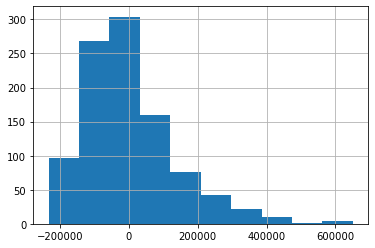

In [10]:
# ANSWER

residuals = housing['price']-predicted_price

residuals.hist()

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [11]:
# ANSWER

X = housing['sq__ft']
Y = housing['price']

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [12]:
# ANSWER

beta_1 = ((Y-np.mean(Y)) * (X-np.mean(X))).sum() / ((X-np.mean(X))**2).sum()

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [13]:
# ANSWER
beta_0 = np.mean(Y)-beta_1*np.mean(X)

beta_0

162930.16140699777

In [14]:
np.polyfit(X,Y, 1)

array([5.41586397e+01, 1.62930161e+05])

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [15]:
# ANSWER
Y_hat = beta_0 + beta_1*X

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [16]:
# ANSWER

residuals_linear = housing['price']-Y_hat

In [17]:
b_0, b_1 = np.polyfit(np.log(X+0.05), np.log(Y), 1)

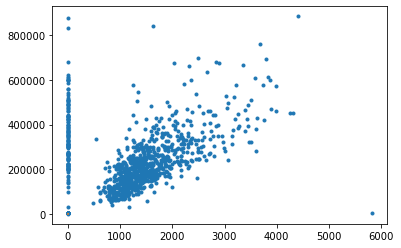

In [18]:
x_lim = np.array([5, 9])
y_lim = b_0 + b_1*x_lim

plt.plot(X,Y, linestyle='None', marker='.')
plt.plot(x_lim, y_lim)
plt.show()

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as
$$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}}  = \frac{\sum(\hat y_i - \bar y)^2}{SS_{tot}}$$
, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [19]:
# ANSWER

SS_res = np.sum(residuals_linear**2)

SS_tot = np.sum((housing['price']-predicted_price)**2)


R_squared = 1 - SS_res/SS_tot

R_squared

0.11148717682951459

##### 2.7.F [BONUS] Draw Plot of Predicted Line

In [20]:
# ANSWER


##### 2.7.G [BONUS] Draw Plot of Predicted Line With Residuals

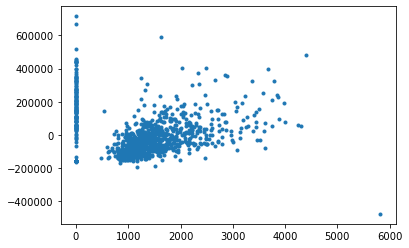

In [21]:
# ANSWER
plt.plot(X, residuals_linear, linestyle='None', marker='.')

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [22]:
# ANSWER
predicted = b_0 + b_1*1204
print(predicted)

14025.55534659762




---



---



> > > > > > > > > © 2021 Institute of Data


---



---



